In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [266]:
data = pd.read_csv('../data/data_fix.txt')

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17368 entries, 0 to 17367
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   coupon     317 non-null    object 
 1   currency   17368 non-null  object 
 2   driver     17368 non-null  int64  
 3   fact_km    12705 non-null  float64
 4   order      17368 non-null  int64  
 5   plan_km    17368 non-null  float64
 6   plan_time  17368 non-null  float64
 7   user       17368 non-null  int64  
 8   zone       17368 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [268]:
data['currency'].unique()
len(data[data['currency'] == 'USD'])

1

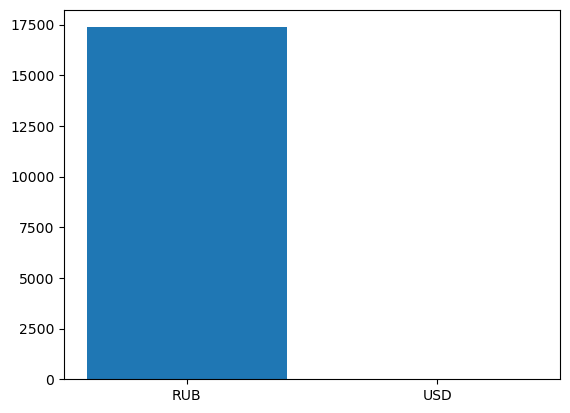

In [269]:
plt.bar(data['currency'].unique(), [len(data[data['currency'] == 'RUB']), len(data[data['currency'] == 'USD'])])
plt.show()

In [270]:
# подозрительный 2)
data.query('currency == "USD"')

,coupon,currency,driver,fact_km,order,plan_km,plan_time,user,zone
16184,NaN,USD,87453549,NaN,9218035,0.616003,3.366667,99251227,moscow


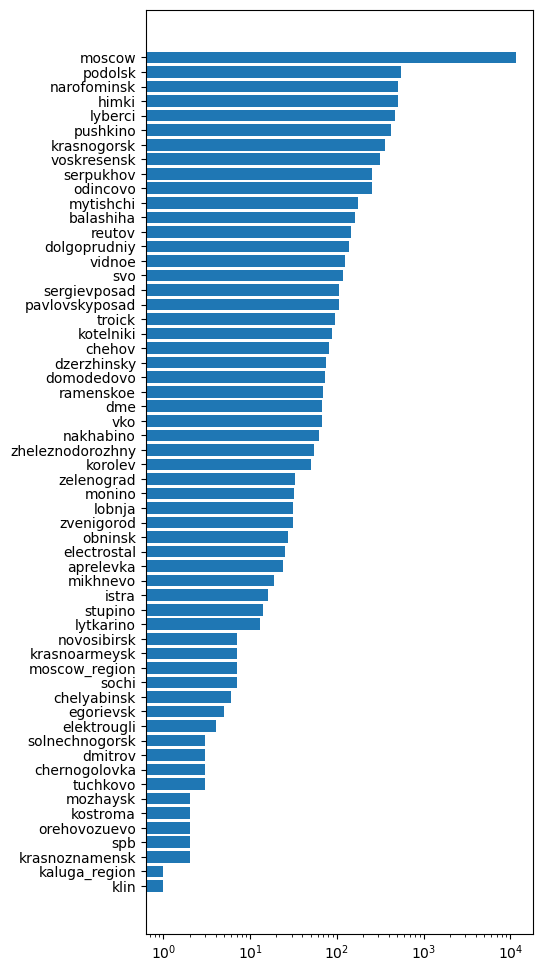

In [271]:
# подоззрительный 1)
zones = data.groupby('zone')['user'].count().reset_index()
zones.columns = ['zone', 'count']
zones.sort_values(by='count', inplace=True)
plt.figure(figsize=(5,12))
plt.barh(zones['zone'], zones['count'] , )
plt.xscale('log')
plt.xticks()
plt.show()

In [272]:
data[data['zone'] == 'chel']

,coupon,currency,driver,fact_km,order,plan_km,plan_time,user,zone


In [273]:
data['coupon'].fillna(0, inplace=True)

C:\Users\giezz\AppData\Local\Temp\ipykernel_12320\55966403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['coupon'].fillna(0, inplace=True)


In [274]:
data['coupon'].unique()

array([0, 'micro_code', 'free_ride'], dtype=object)

In [275]:
coupones = data.groupby(['driver', 'coupon']).size().unstack(fill_value=0)

In [276]:
# подозрительный по 3)
coupones[coupones['free_ride'] == coupones['free_ride'].max()]

coupon,0,free_ride,micro_code
driver,,,
39939250,0,234,0


In [277]:
coupones[coupones['micro_code'] == coupones['micro_code'].max()]

coupon,0,free_ride,micro_code
driver,,,
60654971,101,0,4
93261902,102,0,4


In [278]:
data_km = data[data['fact_km'] != 0]
data_km['km_diff'] = data['plan_km'] / data['fact_km']
data_km.fillna(0, inplace=True)

C:\Users\giezz\AppData\Local\Temp\ipykernel_12320\1991665430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_km['km_diff'] = data['plan_km'] / data['fact_km']
C:\Users\giezz\AppData\Local\Temp\ipykernel_12320\1991665430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_km.fillna(0, inplace=True)


In [279]:
# подозрительный 4)
final_df = data_km.sort_values(by=['km_diff'], ascending=False)
final_df[final_df['km_diff'] == final_df['km_diff'].max()]

,coupon,currency,driver,fact_km,order,plan_km,plan_time,user,zone,km_diff
16211,0,RUB,59986309,0.01,38129866,1000.0,11.366667,8004508,serpukhov,100000.0


In [284]:
# 5) С большим количеством поездок и нулевой дисперсией fact_km (или plan_km, или plan_time) - два художника
data.groupby('driver')['driver'].count().sort_values()

driver
76456337      1
11808557      1
58859252      1
59986309      1
76836257      1
           ... 
39939250    234
36098567    252
67724939    282
46629985    326
56872166    430
Name: driver, Length: 199, dtype: int64

In [281]:
# 6) Все поездки были с одним компаньоном, при этом поездок много

driver_user = data.groupby('driver')['user'].nunique().reset_index().query('user == 1')
data[data['driver'].isin(driver_user['driver'].to_list())].groupby('driver')['driver'].count()

driver
9599990      1
11808557     1
39802715     1
58859252     1
59986309     1
76456337     1
76836257     1
87453549     1
90985908    16
Name: driver, dtype: int64